# Uso de ARIMA Model para la predicción del clima a mediano plazo

### Información

Para el siguiente ejercicio vamos a utiliza la base de datos de temperatura de la Universidad de Delaware, la cual esta disponible en [link]("http://climate.geog.udel.edu/~climate/html_pages/download.html#T2017"), para tu comodidad esta información ya se encuentra preprocesada en la siguiente ruta `data/ejemplo_arima.csv`.

Source: Willmott, C. J. and K. Matsuura (2001) Terrestrial Air Temperature and Precipitation: Monthly and Annual Time Series (1900 - 2017), http://climate.geog.udel.edu/~climate/html_pages/download.html#T2017

### Estructura

La estructura de la base de datos es la siguiente:

>Fecha : Fecha correspondiente al dato : AAAA-MM-DD

>Lat   : Latitud                       : Float

>Long  : Longitud                      : Float

>Valor : Valor de temperatura          : Float



In [36]:
# librerías
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import seaborn as sns

warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

import pandas as pd
import statsmodels.api as sm

%matplotlib inline

In [2]:
rcParams['figure.figsize'] = 18, 8

In [3]:
# leer csv
df = pd.read_csv("data/ejemplo_arima.csv")

In [4]:
# verificar estructura del archivo
df.head()

,Fecha,Lat,Long,Valor
0,1900-01-01,22.25,-102.25,11.7
1,1900-02-01,22.25,-102.25,13.1
2,1900-03-01,22.25,-102.25,14.5
3,1900-04-01,22.25,-102.25,16.5
4,1900-05-01,22.25,-102.25,19.6


In [5]:
# estadísticas básicas del df
df.describe()

,Lat,Long,Valor
count,1416.00,1416.00,1416.000000
mean,22.25,-102.25,16.968503
std,0.00,0.00,3.128690
min,22.25,-102.25,9.000000
25%,22.25,-102.25,14.300000
50%,22.25,-102.25,17.700000
75%,22.25,-102.25,19.400000
max,22.25,-102.25,27.200000


In [6]:
# inforamción general del df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416 entries, 0 to 1415
Data columns (total 4 columns):
Fecha    1416 non-null object
Lat      1416 non-null float64
Long     1416 non-null float64
Valor    1416 non-null float64
dtypes: float64(3), object(1)
memory usage: 44.3+ KB


In [7]:
# convertir la columna Fecha de objeto a formato datatime
df["Fecha"] = pd.to_datetime(df["Fecha"])
df.index = df["Fecha"]
df.head()

,Fecha,Lat,Long,Valor
Fecha,,,,
1900-01-01,1900-01-01,22.25,-102.25,11.7
1900-02-01,1900-02-01,22.25,-102.25,13.1
1900-03-01,1900-03-01,22.25,-102.25,14.5
1900-04-01,1900-04-01,22.25,-102.25,16.5
1900-05-01,1900-05-01,22.25,-102.25,19.6


In [8]:
# obtener la serie de tiempo para análisis
ts = df["Valor"]

In [9]:
# desplegar la serie de tiempo
ts

Fecha
1900-01-01    11.7
1900-02-01    13.1
1900-03-01    14.5
1900-04-01    16.5
1900-05-01    19.6
1900-06-01    22.0
1900-07-01    19.4
1900-08-01    18.6
1900-09-01    18.9
1900-10-01    17.7
1900-11-01    14.4
1900-12-01    11.3
1901-01-01    11.9
1901-02-01    12.6
1901-03-01    14.6
1901-04-01    17.2
1901-05-01    20.2
1901-06-01    22.2
1901-07-01    19.8
1901-08-01    19.6
1901-09-01    18.9
1901-10-01    16.7
1901-11-01    13.8
1901-12-01    10.6
1902-01-01    11.2
1902-02-01    12.7
1902-03-01    14.8
1902-04-01    18.5
1902-05-01    20.7
1902-06-01    22.2
              ... 
2015-07-01    18.8
2015-08-01    19.6
2015-09-01    19.4
2015-10-01    18.0
2015-11-01    16.8
2015-12-01    13.1
2016-01-01    10.9
2016-02-01    14.1
2016-03-01    14.9
2016-04-01    17.6
2016-05-01    21.0
2016-06-01    20.3
2016-07-01    19.8
2016-08-01    19.0
2016-09-01    19.3
2016-10-01    18.1
2016-11-01    14.3
2016-12-01    14.2
2017-01-01    13.2
2017-02-01    14.9
2017-03-01    16.5
2017-0

In [10]:
# desplegar la información correspondiente al año 1980
ts["1980"]

Fecha
1980-01-01    18.7
1980-02-01    13.1
1980-03-01    16.1
1980-04-01    17.1
1980-05-01    20.3
1980-06-01    20.8
1980-07-01    20.4
1980-08-01    20.1
1980-09-01    19.3
1980-10-01    17.4
1980-11-01    13.5
1980-12-01    12.9
Name: Valor, dtype: float64

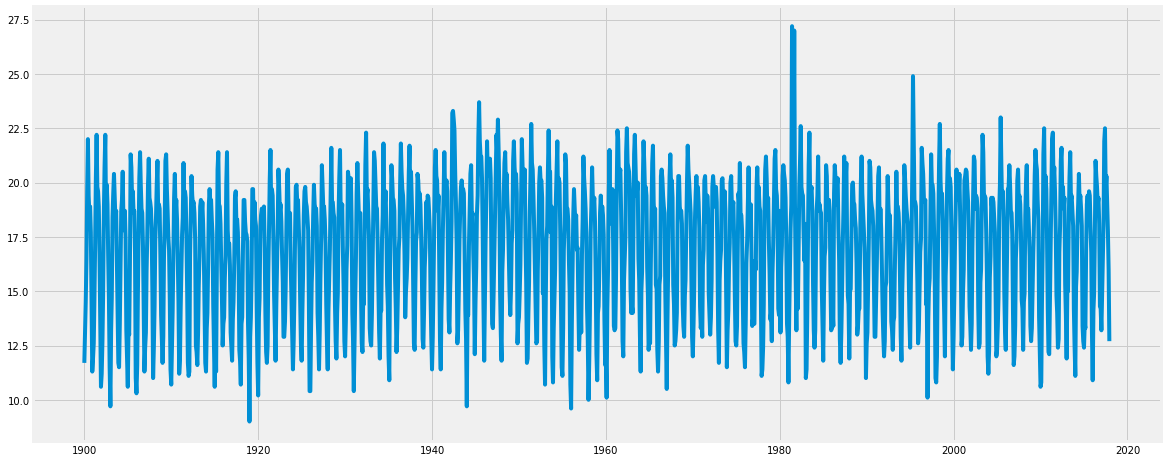

In [11]:
# graficar la serie de tiempo
plt.plot(ts)

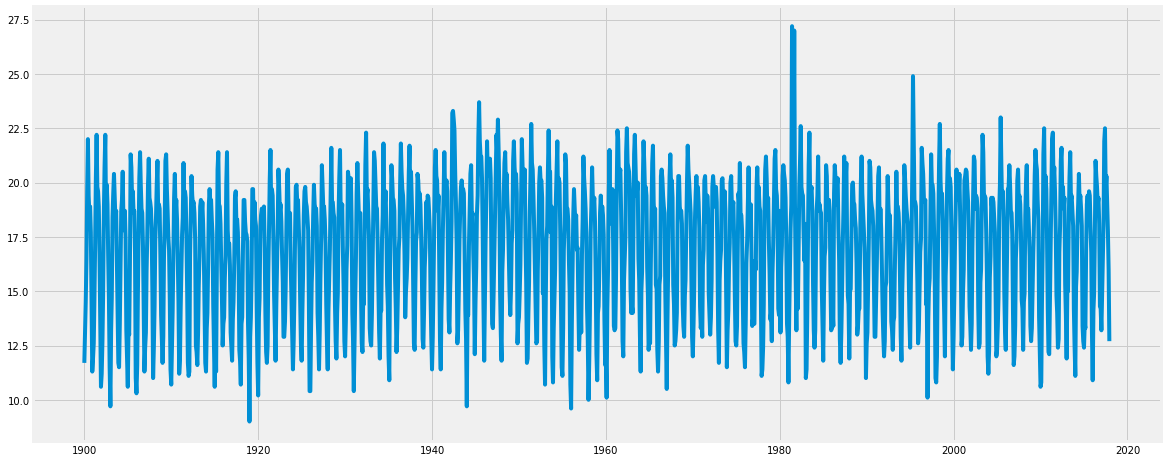

In [12]:
# graficar la serie de tiempo con un formato más visual
plt.plot(ts)

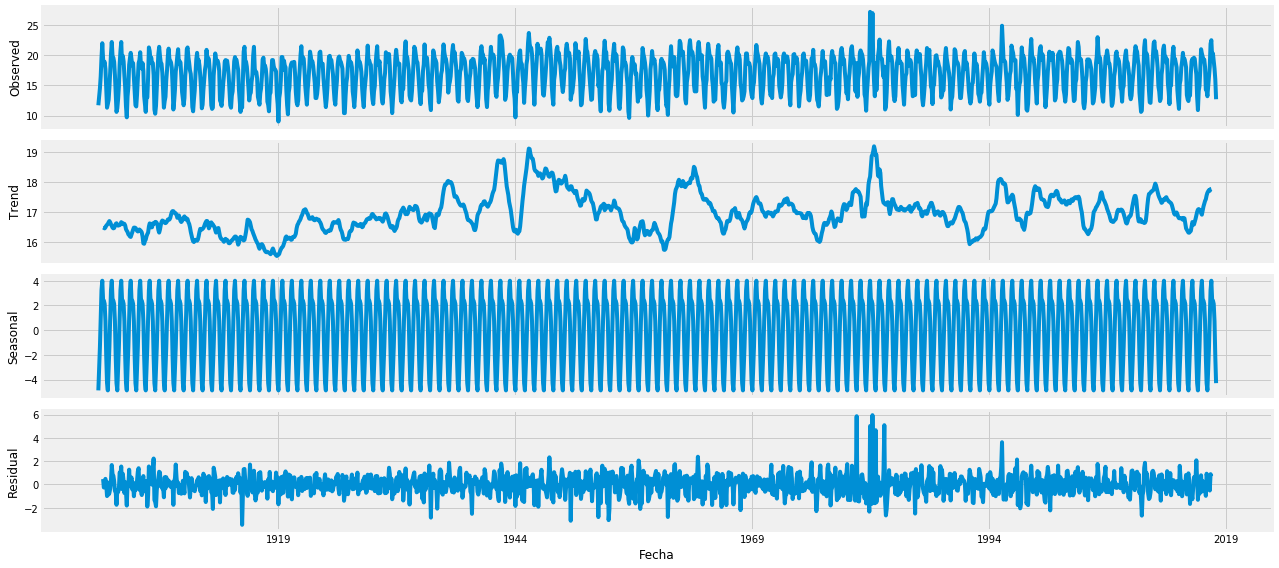

In [13]:
# desplegar gráficas
decomposition = sm.tsa.seasonal_decompose(ts, model='additive')
fig = decomposition.plot()
plt.show()

In [15]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [16]:
# obtener los parámetro optimo para el modelo
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(ts,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

/home/jorge/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/jorge/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:12078.154666960205
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:10283.359080775463
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:4963.2931702725855


/home/jorge/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/jorge/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:4208.600282567491
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:4966.230050612572


/home/jorge/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/jorge/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:4241.504935641277
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:4565.058565632243


/home/jorge/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/jorge/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:4211.25715306578


/home/jorge/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:10314.757659156126


/home/jorge/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:8921.760754886156
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:4893.516339418706


/home/jorge/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/jorge/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:4057.8134931967843


/home/jorge/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:4898.208428345254


/home/jorge/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/jorge/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jorge/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:4918.008067114604
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:4446.318328558249


/home/jorge/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:4059.8134351281788
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:6084.662159720499


/home/jorge/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/jorge/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:5664.420717545151
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:5542.649406208042


/home/jorge/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/jorge/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:4492.825648477416
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:5275.459747021303


/home/jorge/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/jorge/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:4528.94704664665
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:4976.259761129999


/home/jorge/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/jorge/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:4489.59114493481
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:5949.065140168874


/home/jorge/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/jorge/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:5654.728600152996
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:4968.675787651687


/home/jorge/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/jorge/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:3974.0942138890637
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:4903.4867208609


/home/jorge/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/jorge/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:4003.938089763999


/home/jorge/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:4485.615374652783


/home/jorge/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:3977.752332378018
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:6085.316293246098


/home/jorge/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/jorge/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:5662.179597936238
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:4880.3369819820855


/home/jorge/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/jorge/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:4002.9055225499123


/home/jorge/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:4879.19759244624


/home/jorge/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/jorge/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jorge/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:4033.13801469961
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:4410.7278250706695


/home/jorge/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:4004.9053200956473
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:5947.190331626613


/home/jorge/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/jorge/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:5652.536054951618


/home/jorge/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:4858.27481976216


/home/jorge/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:3936.3877617737285


/home/jorge/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:4857.887028374587


/home/jorge/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:3968.7543171899297


/home/jorge/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:4390.23011660524


/home/jorge/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:3938.3742356879357
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:5925.261254223455


/home/jorge/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/jorge/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:5656.921755383979
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:5240.384024637888


/home/jorge/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/jorge/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:4230.766924298503
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:5096.733834114071


/home/jorge/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/jorge/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/jorge/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jorge/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:4264.6399144759525
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:4726.592701344833


/home/jorge/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:4231.5909548309355
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:5923.47580639917


/home/jorge/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/jorge/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:5652.647203139562


/home/jorge/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:4883.110617267923


/home/jorge/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:3931.1539564113964


/home/jorge/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:4779.436219248622


/home/jorge/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:3962.126339586671


/home/jorge/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:4416.783032068595


/home/jorge/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:3934.1335853649766


In [17]:
mod = sm.tsa.statespace.SARIMAX(ts,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

/home/jorge/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2294      0.026      8.788      0.000       0.178       0.281
ma.L1         -0.9147      0.013    -73.099      0.000      -0.939      -0.890
ar.S.L12      -0.0491      0.024     -2.020      0.043      -0.097      -0.001
ma.S.L12      -1.0000     17.324     -0.058      0.954     -34.955      32.955
sigma2         0.9474     16.422      0.058      0.954     -31.239      33.134


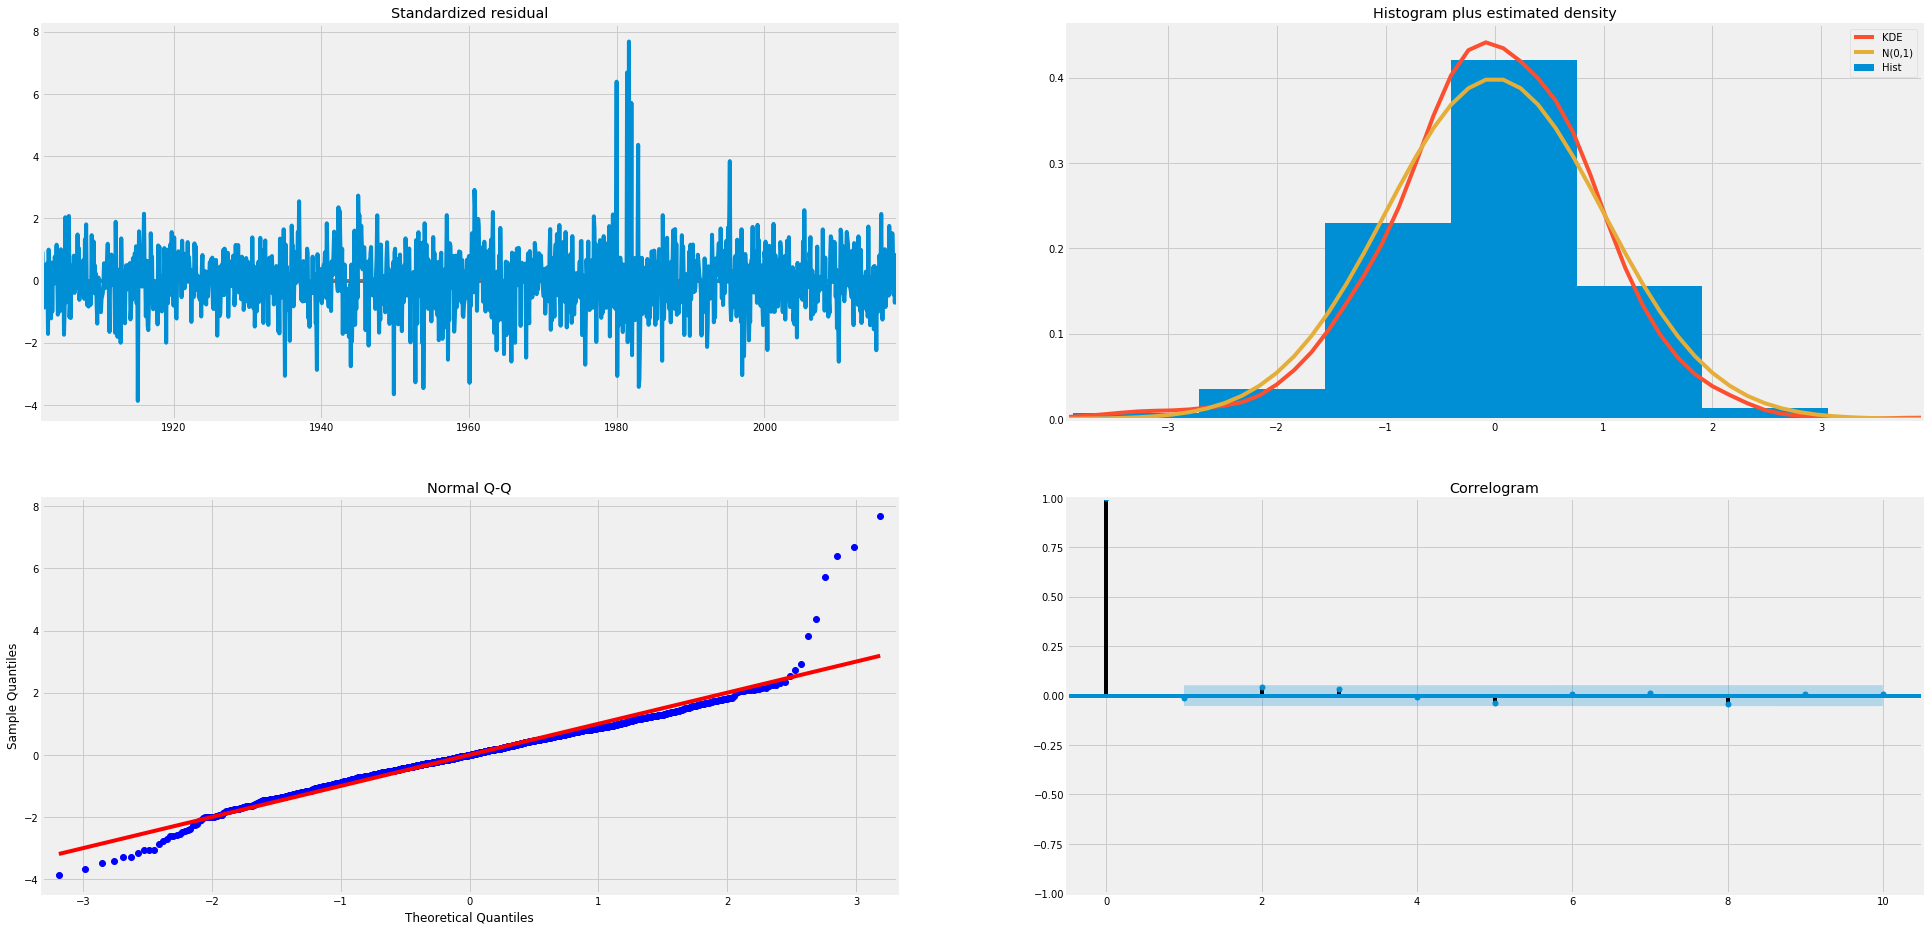

In [18]:
results.plot_diagnostics(figsize=(30, 16))
plt.show()

In [19]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()

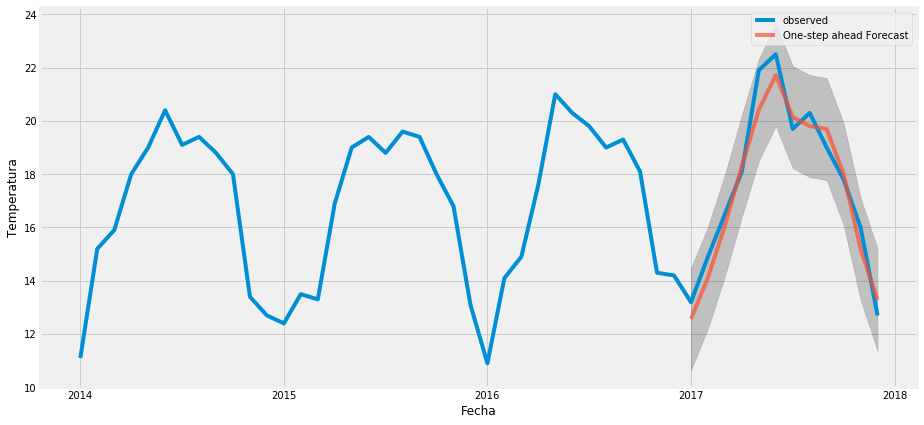

In [20]:
ax = ts['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Fecha')
ax.set_ylabel('Temperatura')
plt.legend()
plt.show()

In [21]:
y_forecasted = pred.predicted_mean
y_truth = ts['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.5


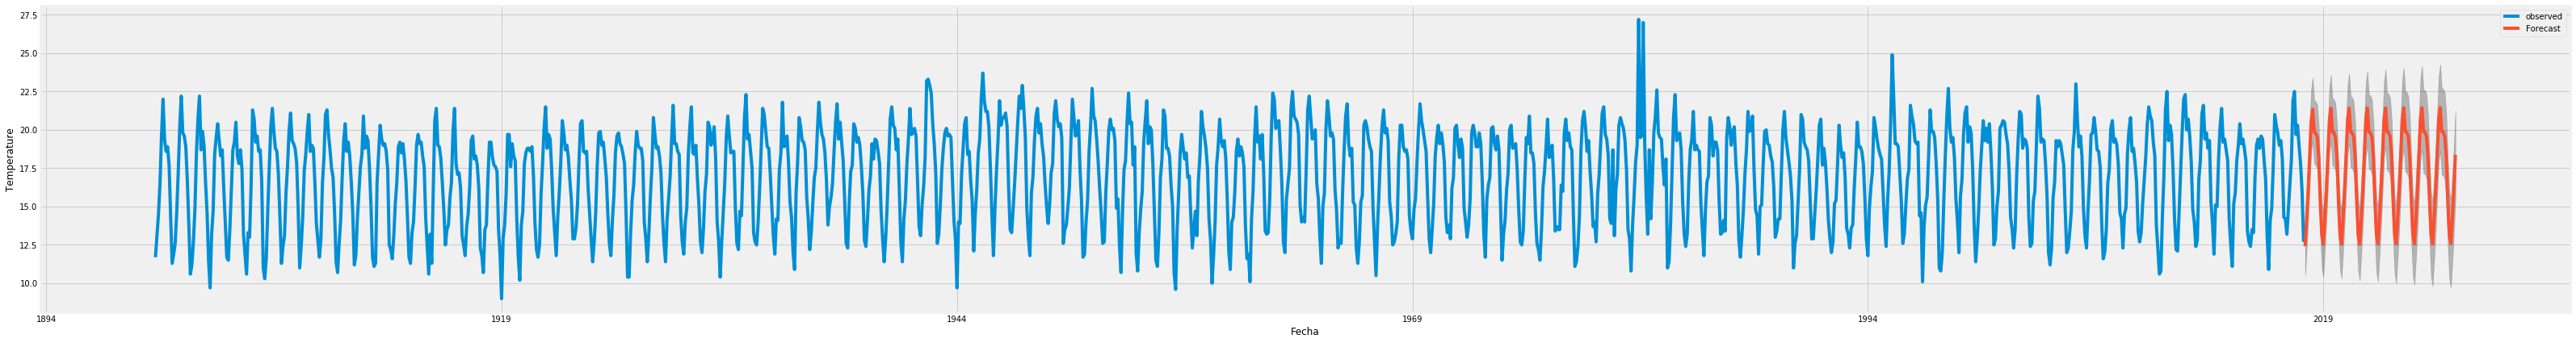

In [22]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = ts.plot(label='observed', figsize=(50, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Fecha')
ax.set_ylabel('Temperature')
plt.legend()
plt.show()

In [32]:
pred_uc.predicted_mean['2019-05'][0]

20.65331458677034

In [31]:
ts["1900"]

Fecha
1900-01-01    11.7
1900-02-01    13.1
1900-03-01    14.5
1900-04-01    16.5
1900-05-01    19.6
1900-06-01    22.0
1900-07-01    19.4
1900-08-01    18.6
1900-09-01    18.9
1900-10-01    17.7
1900-11-01    14.4
1900-12-01    11.3
Name: Valor, dtype: float64

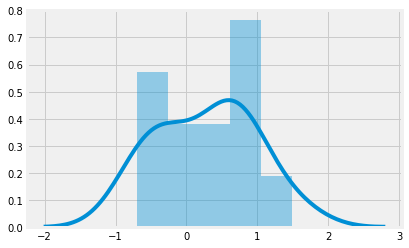

In [45]:
sns.distplot((y_truth-y_forecasted), bins=5)

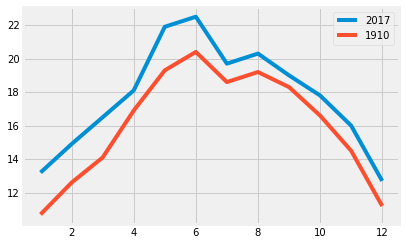

In [56]:
# evaluar las diferencias
X = np.arange(1,13)
plt.plot(X,y_truth.values, label="2017")
#plt.plot(X,ts["1950"].values, label="1950")
plt.plot(X,ts["1910"].values, label="1910")
plt.legend()